<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/dchW6D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What You Need to Do

1. Load and Preprocess the MNIST Dataset

Load the MNIST dataset using TensorFlow/Keras
Normalize the image pixel values to be between 0 and 1
Convert labels into one-hot encoded format
Split the dataset into training and test sets
Display sample images with their corresponding labels

2. Build a Fully Connected Neural Network

Define a sequential model using Keras
Flatten the 28x28 input images into a single vector
Add two hidden layers with ReLU activation
Add an output layer with Softmax activation for multi-class classification
Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric

3. Train the Neural Network

Fit the model to the training data for 10 epochs
Use a validation set to track performance during training
Observe the loss and accuracy trends over the epochs

4. Evaluate the Model’s Performance

Compute accuracy on the test dataset
Display a confusion matrix for misclassified digits
Identify which digits the model struggles with the most


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


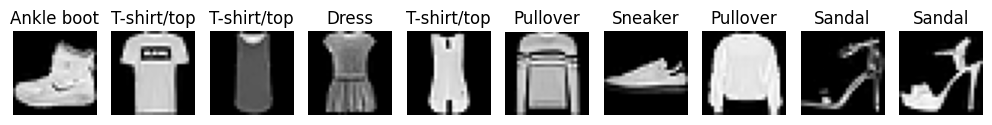

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.7797 - loss: 0.6104 - val_accuracy: 0.8461 - val_loss: 0.4138
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8639 - loss: 0.3702 - val_accuracy: 0.8593 - val_loss: 0.3837
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8759 - loss: 0.3323 - val_accuracy: 0.8613 - val_loss: 0.3691
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8862 - loss: 0.3034 - val_accuracy: 0.8729 - val_loss: 0.3468
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8911 - loss: 0.2887 - val_accuracy: 0.8535 - val_loss: 0.4111
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8975 - loss: 0.2733 - val_accuracy: 0.8725 - val_loss: 0.3548
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9022 - loss: 0.2558 - val_accuracy: 0.8674 - val_loss: 0.3745
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9040 - loss: 

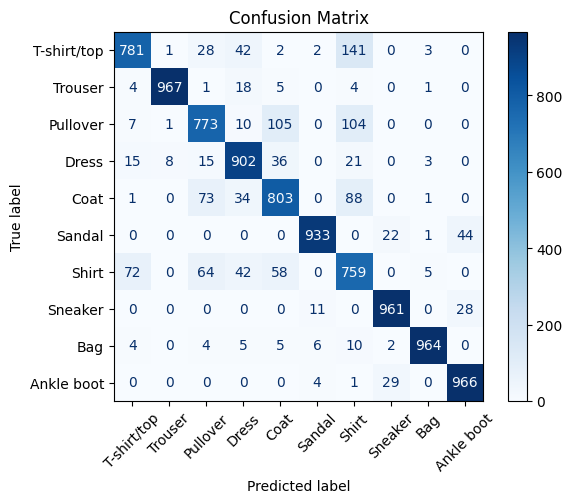

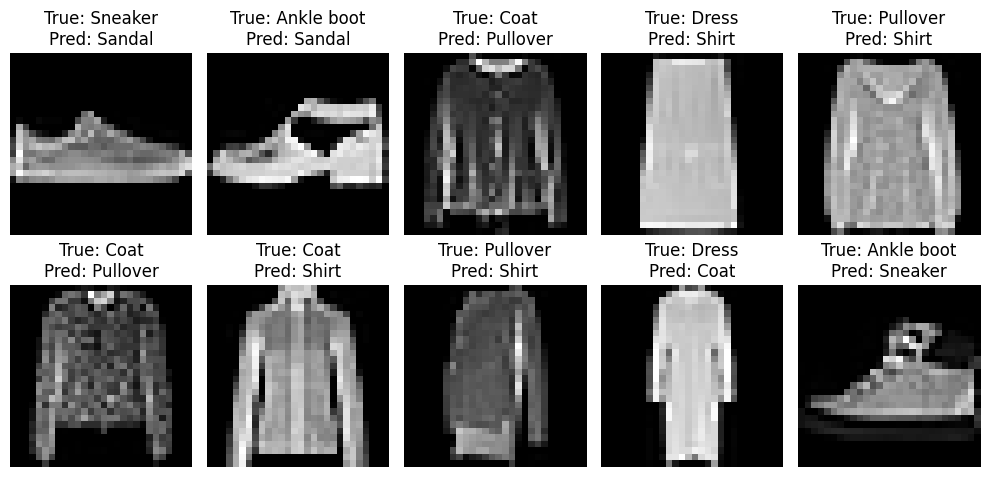

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Load and preprocess the data
(x_train_data, y_train_data), (x_test_data, y_test_data) = keras.datasets.fashion_mnist.load_data()

def preprocessing_function(x_new, y_new):
    x_new = tf.cast(x_new, tf.float32) / 255.0  # Normalize
    y_new = tf.cast(y_new, tf.int64)            # Ensure correct type
    return x_new, y_new

def func_creating_dataset(xs_data, ys_data, num_classes=10):
    ys_data = tf.one_hot(ys_data, depth=num_classes)
    return tf.data.Dataset.from_tensor_slices((xs_data, ys_data)) \
        .map(preprocessing_function) \
        .shuffle(1000) \
        .batch(32)

# Create training and validation datasets
dataset_training = func_creating_dataset(x_train_data, y_train_data)
dataset_val = func_creating_dataset(x_test_data, y_test_data)

# Display some sample images
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train_data[i], cmap="gray")
    plt.title(class_names[y_train_data[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

# 2. Build the model
My_model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

# 3. Compile the model
My_model.compile(
    optimizer='adam',
    loss=tf.losses.CategoricalCrossentropy(from_logits=False),  # From logits must be False
    metrics=['accuracy']
)

# 4. Train the model
history = My_model.fit(
    dataset_training,
    validation_data=dataset_val,
    epochs=10
)

# 5. Evaluate the model
test_loss, test_accuracy = My_model.evaluate(dataset_val)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

# 6. Make predictions on test data
x_test_norm = x_test_data / 255.0
predictions = My_model.predict(x_test_norm)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test_data

# 7. Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 8. Visualize some misclassified images
misclassified_indices = np.where(predicted_labels != true_labels)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test_data[idx], cmap="gray")
    plt.title(f"True: {class_names[true_labels[idx]]}\nPred: {class_names[predicted_labels[idx]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
